In [3]:
import json
import pandas as pd

## Ручная оценка

In [14]:
data = list()
with open('generated_pred_params.jsonl', 'r') as f:
    for dialog in f.readlines():
        dialog = json.loads(dialog)
        data.append(dialog)

In [15]:
dataset = pd.DataFrame(data)

In [16]:
dataset.head()

,dialog,pred_params,answer_pred_params,answer_default_params
0,[I was sitting here playing video games and he...,"{'top_p': 0.8, 'top_k': 500, 'typical_p': 1.0,...","[Yeah, thanks., Thanks!, Thanks!]","[Thanks Tony. See you later!, Will do babe. Se..."
1,"[Boy, it's been a lot of owrk, Sometimes we be...","{'top_p': 0.8, 'top_k': 500, 'typical_p': 1.0,...","[You don't even like jokes anymore, do you? is...",[You did the right thing by trying out the thi...
2,[I could've believe my eyes seeing my mom walk...,"{'top_p': 0.7, 'top_k': 500, 'typical_p': 1.0,...",[That would be great! you guys should go and c...,[I am so proud of her. it is a shame that she ...
3,[My neighbor used to have an old beagle - a lo...,"{'top_p': 0.8, 'top_k': 500, 'typical_p': 1.0,...","[Well, if you ever need any advice or want to ...",[Well I'm glad you were able to give her a goo...
4,"[i just ordered some hot wings, Did you get th...","{'top_p': 0.7, 'top_k': 500, 'typical_p': 1.0,...","[Yeah it is pretty convenient., Yeah, i just g...",[Yeah it is. it is a bit of a drive for me but...


In [17]:
sample = dataset.sample(200)
sample.reset_index(drop=True, inplace=True)

In [18]:
sample['num_turns'] = sample['dialog'].apply(lambda x: len(x))

In [19]:
sample.head()

,dialog,pred_params,answer_pred_params,answer_default_params,num_turns
0,"[My dad just started college again!, Amazing! ...","{'top_p': 0.7, 'top_k': 500, 'typical_p': 1.0,...","[Wow, he must be really determined., That's so...",[That's really great that you're supporting hi...,3
1,[My sister n law washed my clothes today for m...,"{'top_p': 0.9, 'top_k': 350, 'typical_p': 1.0,...","[I think she wants to do nice things for me, e...","[Yeah, I really appreciate it. I was feeling a...",2
2,[I just bought a pair of jeans and wasn't expe...,"{'top_p': 0.8, 'top_k': 500, 'typical_p': 1.0,...","[Yeah, I was really hoping these jeans would f...","[Yeah, I was just at the store and bought them...",2
3,[these people at work are so disrespectful and...,"{'top_p': 0.7, 'top_k': 500, 'typical_p': 1.0,...",[Exactly. it's not your job to make sure every...,[That may be true in certain situations but mo...,3
4,[I feel so bad that i failed my last semester ...,"{'top_p': 0.7, 'top_k': 500, 'typical_p': 1.0,...",[I am proud of you for trying your best to pas...,[You should consider studying with a tutor to ...,3


In [20]:
def add_name(s, answer):
    
    if s['num_turns'] % 2 == 0:
        return 'A: ' + s[answer][0]
    else:
        return 'B: ' + s[answer][0]

In [21]:
sample['answer_pred_params'] = sample.apply(add_name, answer='answer_pred_params', axis=1)
sample['answer_default_params'] = sample.apply(add_name, answer='answer_default_params', axis=1)

In [22]:
sample.head()

,dialog,pred_params,answer_pred_params,answer_default_params,num_turns
0,"[My dad just started college again!, Amazing! ...","{'top_p': 0.7, 'top_k': 500, 'typical_p': 1.0,...","B: Wow, he must be really determined.",B: That's really great that you're supporting ...,3
1,[My sister n law washed my clothes today for m...,"{'top_p': 0.9, 'top_k': 350, 'typical_p': 1.0,...","A: I think she wants to do nice things for me,...","A: Yeah, I really appreciate it. I was feeling...",2
2,[I just bought a pair of jeans and wasn't expe...,"{'top_p': 0.8, 'top_k': 500, 'typical_p': 1.0,...","A: Yeah, I was really hoping these jeans would...","A: Yeah, I was just at the store and bought th...",2
3,[these people at work are so disrespectful and...,"{'top_p': 0.7, 'top_k': 500, 'typical_p': 1.0,...",B: Exactly. it's not your job to make sure eve...,B: That may be true in certain situations but ...,3
4,[I feel so bad that i failed my last semester ...,"{'top_p': 0.7, 'top_k': 500, 'typical_p': 1.0,...",B: I am proud of you for trying your best to p...,B: You should consider studying with a tutor t...,3


In [23]:
def add_names(s):
    new_s = list()
    for i, turn in enumerate(s):
        if i % 2 == 0:
            new_s.append('A: ' + turn)
        else:
            new_s.append('B: ' + turn)
    return ' — '.join(new_s)

In [24]:
sample['Dialog'] = sample['dialog'].apply(add_names)

In [25]:
sample.head()

,dialog,pred_params,answer_pred_params,answer_default_params,num_turns,Dialog
0,"[My dad just started college again!, Amazing! ...","{'top_p': 0.7, 'top_k': 500, 'typical_p': 1.0,...","B: Wow, he must be really determined.",B: That's really great that you're supporting ...,3,A: My dad just started college again! — B: Ama...
1,[My sister n law washed my clothes today for m...,"{'top_p': 0.9, 'top_k': 350, 'typical_p': 1.0,...","A: I think she wants to do nice things for me,...","A: Yeah, I really appreciate it. I was feeling...",2,A: My sister n law washed my clothes today for...
2,[I just bought a pair of jeans and wasn't expe...,"{'top_p': 0.8, 'top_k': 500, 'typical_p': 1.0,...","A: Yeah, I was really hoping these jeans would...","A: Yeah, I was just at the store and bought th...",2,A: I just bought a pair of jeans and wasn't ex...
3,[these people at work are so disrespectful and...,"{'top_p': 0.7, 'top_k': 500, 'typical_p': 1.0,...",B: Exactly. it's not your job to make sure eve...,B: That may be true in certain situations but ...,3,A: these people at work are so disrespectful a...
4,[I feel so bad that i failed my last semester ...,"{'top_p': 0.7, 'top_k': 500, 'typical_p': 1.0,...",B: I am proud of you for trying your best to p...,B: You should consider studying with a tutor t...,3,A: I feel so bad that i failed my last semeste...


In [26]:
print(sample['Dialog'][0])

A: My dad just started college again! — B: Amazing! How old is he? — A: He's 45 and just going back now, to start his business degree


In [27]:
import random

In [28]:
sample['first'] = random.choices(['pred', 'default'], k=len(sample))

In [29]:
sample.head()

,dialog,pred_params,answer_pred_params,answer_default_params,num_turns,Dialog,first
0,"[My dad just started college again!, Amazing! ...","{'top_p': 0.7, 'top_k': 500, 'typical_p': 1.0,...","B: Wow, he must be really determined.",B: That's really great that you're supporting ...,3,A: My dad just started college again! — B: Ama...,default
1,[My sister n law washed my clothes today for m...,"{'top_p': 0.9, 'top_k': 350, 'typical_p': 1.0,...","A: I think she wants to do nice things for me,...","A: Yeah, I really appreciate it. I was feeling...",2,A: My sister n law washed my clothes today for...,pred
2,[I just bought a pair of jeans and wasn't expe...,"{'top_p': 0.8, 'top_k': 500, 'typical_p': 1.0,...","A: Yeah, I was really hoping these jeans would...","A: Yeah, I was just at the store and bought th...",2,A: I just bought a pair of jeans and wasn't ex...,default
3,[these people at work are so disrespectful and...,"{'top_p': 0.7, 'top_k': 500, 'typical_p': 1.0,...",B: Exactly. it's not your job to make sure eve...,B: That may be true in certain situations but ...,3,A: these people at work are so disrespectful a...,pred
4,[I feel so bad that i failed my last semester ...,"{'top_p': 0.7, 'top_k': 500, 'typical_p': 1.0,...",B: I am proud of you for trying your best to p...,B: You should consider studying with a tutor t...,3,A: I feel so bad that i failed my last semeste...,pred


In [30]:
sample['first'].value_counts()

pred       103
default     97
Name: first, dtype: int64

In [35]:
def order_option1(first, pred, default):
    if first == 'pred':
        return pred[0]
    else:
        return default[0]
    
def order_option2(first, pred, default):
    if first == 'pred':
        return default[0]
    else:
        return pred[0]

In [36]:
sample['Option 1'] = sample.apply(lambda x: order_option1(x['first'], x['answer_pred_params'], x['answer_default_params']), axis=1)
sample['Option 2'] = sample.apply(lambda x: order_option2(x['first'], x['answer_pred_params'], x['answer_default_params']), axis=1)

In [37]:
sample[['Dialog', 'Option 1', 'Option 2', 'first']].to_csv('ranking_sample_with_answers.csv')

In [38]:
sample[['Dialog', 'Option 1', 'Option 2']].to_csv('ranking_sample.csv')

### Готовая разметка

In [271]:
sample_ready = pd.read_csv('ranking_sample_ready.csv')

In [272]:
sample.head()

,dialog,pred_params,answer_pred_params,answer_default_params,num_turns,dialog_pretty,first,option_1,option_2
0,[I took a third trip to the grocery store hopi...,"{'top_p': 1.0, 'top_k': 50, 'typical_p': 1.0, ...","B: That's unfortunate, let's do something abou...",B: That's really unfortunate. i hope they catc...,3,A: I took a third trip to the grocery store ho...,pred,"B: That's unfortunate, let's do something abou...",B: That's really unfortunate. i hope they catc...
1,[My children are both fast asleep and I am the...,"{'top_p': 1.0, 'top_k': 50, 'typical_p': 1.0, ...",A: How did you even find it possible to enjoy ...,A: It was nicer to be able to sleep in. we nev...,4,A: My children are both fast asleep and I am t...,default,A: It was nicer to be able to sleep in. we nev...,A: How did you even find it possible to enjoy ...
2,"[I am alone in the house my parents travelled,...","{'top_p': 1.0, 'top_k': 50, 'typical_p': 1.0, ...","A: No, my parents never did before and i am al...",A: I don't think there is anything i could do....,4,A: I am alone in the house my parents travelle...,default,A: I don't think there is anything i could do....,"A: No, my parents never did before and i am al..."
3,[When I was younger I slept in the attic of wh...,"{'top_p': 1.0, 'top_k': 50, 'typical_p': 1.0, ...","A: Yeah, me too. The next morning, I woke one ...","A: Yes, I am sure I did. It's not something th...",4,A: When I was younger I slept in the attic of ...,default,"A: Yes, I am sure I did. It's not something th...","A: Yeah, me too. The next morning, I woke one ..."
4,[It is so wonderful to just relax at home on t...,"{'top_p': 1.0, 'top_k': 50, 'typical_p': 1.0, ...",B: It is so nice to take time with family. the...,B: I think that's wonderful that you have such...,3,A: It is so wonderful to just relax at home on...,default,B: I think that's wonderful that you have such...,B: It is so nice to take time with family. the...


In [273]:
sample_ready.head()

,Dialog,Option 1,Option 2,Choice (1 or 2)
0,A: I took a third trip to the grocery store ho...,"B: That's unfortunate, let's do something abou...",B: That's really unfortunate. i hope they catc...,2
1,A: My children are both fast asleep and I am t...,A: It was nicer to be able to sleep in. we nev...,A: How did you even find it possible to enjoy ...,1
2,A: I am alone in the house my parents travelle...,A: I don't think there is anything i could do....,"A: No, my parents never did before and i am al...",2
3,A: When I was younger I slept in the attic of ...,"A: Yes, I am sure I did. It's not something th...","A: Yeah, me too. The next morning, I woke one ...",1
4,A: It is so wonderful to just relax at home on...,B: I think that's wonderful that you have such...,B: It is so nice to take time with family. the...,2


In [274]:
sample_ready['first'] = sample['first']

In [275]:
sample_ready.head()

,Dialog,Option 1,Option 2,Choice (1 or 2),first
0,A: I took a third trip to the grocery store ho...,"B: That's unfortunate, let's do something abou...",B: That's really unfortunate. i hope they catc...,2,pred
1,A: My children are both fast asleep and I am t...,A: It was nicer to be able to sleep in. we nev...,A: How did you even find it possible to enjoy ...,1,default
2,A: I am alone in the house my parents travelle...,A: I don't think there is anything i could do....,"A: No, my parents never did before and i am al...",2,default
3,A: When I was younger I slept in the attic of ...,"A: Yes, I am sure I did. It's not something th...","A: Yeah, me too. The next morning, I woke one ...",1,default
4,A: It is so wonderful to just relax at home on...,B: I think that's wonderful that you have such...,B: It is so nice to take time with family. the...,2,default


In [277]:
def score(choice, first):
    if choice == 1:
        if first == 'default':
            return 'default'
        else:
            return 'pred'
    else:
        if first == 'default':
            return 'pred'
        else:
            return 'default'  

In [279]:
sample_ready['best'] = sample_ready.apply(lambda x: score(x['Choice (1 or 2)'], x['first']), axis=1)

In [280]:
sample_ready.head()

,Dialog,Option 1,Option 2,Choice (1 or 2),first,best
0,A: I took a third trip to the grocery store ho...,"B: That's unfortunate, let's do something abou...",B: That's really unfortunate. i hope they catc...,2,pred,default
1,A: My children are both fast asleep and I am t...,A: It was nicer to be able to sleep in. we nev...,A: How did you even find it possible to enjoy ...,1,default,default
2,A: I am alone in the house my parents travelle...,A: I don't think there is anything i could do....,"A: No, my parents never did before and i am al...",2,default,pred
3,A: When I was younger I slept in the attic of ...,"A: Yes, I am sure I did. It's not something th...","A: Yeah, me too. The next morning, I woke one ...",1,default,default
4,A: It is so wonderful to just relax at home on...,B: I think that's wonderful that you have such...,B: It is so nice to take time with family. the...,2,default,pred


In [281]:
sample_ready.best.value_counts()

default    164
pred       136
Name: best, dtype: int64

In [282]:
sample_ready[sample_ready['best'] == 'default']

,Dialog,Option 1,Option 2,Choice (1 or 2),first,best
0,A: I took a third trip to the grocery store ho...,"B: That's unfortunate, let's do something abou...",B: That's really unfortunate. i hope they catc...,2,pred,default
1,A: My children are both fast asleep and I am t...,A: It was nicer to be able to sleep in. we nev...,A: How did you even find it possible to enjoy ...,1,default,default
3,A: When I was younger I slept in the attic of ...,"A: Yes, I am sure I did. It's not something th...","A: Yeah, me too. The next morning, I woke one ...",1,default,default
10,A: My girlfriend has been ignoring me for the ...,A: It sucks because i miss her and care for he...,"A: Yeah, it is pretty annoying. I don't know w...",1,default,default
11,A: I have an interview tomorrow and I just kee...,A: Thanks. I appreciate it. Wish me luck!,A: Well thanks for the encouragement. I hope i...,1,default,default
...,...,...,...,...,...,...
289,A: I saw my 3 year old nephew yesterday — B: O...,"A: Yeah, he was running around and trying to c...","A: Yeah, he did. I think he misses you lately.",1,default,default
290,A: I setup a job interview for next week. I th...,B: Yeah i have no doubt you get that job.,B: Well congratulations again! i know you will...,1,default,default
294,A: The sun is shining where I am and I have no...,"A: Yeah, and we just went on a nice long hike ...",A: So this is the nicest day I've had in month...,2,pred,default
297,A: Went for a dip at the pool late one night o...,A: Some of them melted off but other ones just...,"A: Yeah, it took me a while to get them all ba...",2,pred,default


## Оценивание дискриминатором

In [23]:
pairs = list()
with open('generated_pred_params_scores.jsonl', 'r') as f:
    for dialog in f.readlines():
        dialog = json.loads(dialog)
        pairs.append(dialog)

In [24]:
pairs = pd.DataFrame(pairs)

In [25]:
pairs.head()

,dialog,pred_params,answer_pred_params,answer_default_params,score_pred_params,score_default_params
0,[I was sitting here playing video games and he...,"{'top_p': 0.8, 'top_k': 500, 'typical_p': 1.0,...","[Yeah, thanks., Thanks!, Thanks!]","[Thanks Tony. See you later!, Will do babe. Se...",0.074047,0.261888
1,"[Boy, it's been a lot of owrk, Sometimes we be...","{'top_p': 0.8, 'top_k': 500, 'typical_p': 1.0,...","[You don't even like jokes anymore, do you? is...",[You did the right thing by trying out the thi...,0.337055,0.977859
2,[I could've believe my eyes seeing my mom walk...,"{'top_p': 0.7, 'top_k': 500, 'typical_p': 1.0,...",[That would be great! you guys should go and c...,[I am so proud of her. it is a shame that she ...,0.806973,0.965506
3,[My neighbor used to have an old beagle - a lo...,"{'top_p': 0.8, 'top_k': 500, 'typical_p': 1.0,...","[Well, if you ever need any advice or want to ...",[Well I'm glad you were able to give her a goo...,0.645758,0.799222
4,"[i just ordered some hot wings, Did you get th...","{'top_p': 0.7, 'top_k': 500, 'typical_p': 1.0,...","[Yeah it is pretty convenient., Yeah, i just g...",[Yeah it is. it is a bit of a drive for me but...,0.340159,0.490708


In [7]:
from scipy.stats import ttest_ind

In [8]:
import numpy as np

In [26]:
np.mean(pairs['score_pred_params']), np.mean(pairs['score_default_params'])

(0.610014149527686, 0.6225696648466431)

In [27]:
np.median(pairs['score_pred_params']), np.median(pairs['score_default_params'])

(0.6514494864580531, 0.6561162744959196)

In [28]:
np.var(pairs['score_pred_params']), np.var(pairs['score_default_params'])

(0.07670877985681337, 0.07269150601415678)

In [29]:
ttest_ind(pairs['score_pred_params'], pairs['score_default_params'])

Ttest_indResult(statistic=-2.7225884156909808, pvalue=0.006485261406085158)

In [30]:
pairs['diff'] = pairs.score_pred_params - pairs.score_default_params

In [31]:
pairs['diff'].mean(), pairs['diff'].min(), pairs['diff'].max()

(-0.012555515318953844, -0.9458800936117768, 0.9730022238412251)

In [18]:
import matplotlib.pyplot as plt

In [20]:
pairs.rename(columns={'score_default_params': 'default', 'score_pred_params': 'predicted'}, inplace=True)

Text(0.5, 1.0, 'Распределение оценок ответов с дефолтными и предсказанными параметрами')

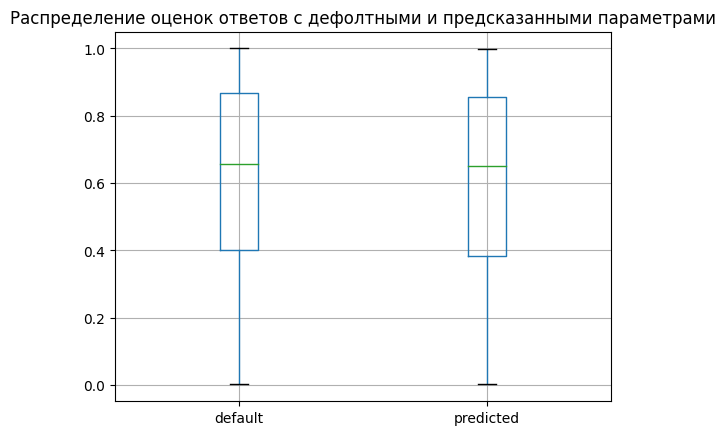

In [21]:
pairs.boxplot(['default', 'predicted'])
plt.title('Распределение оценок ответов с дефолтными и предсказанными параметрами')